In [5]:
import tensorflow as tf

# Churn_Modelling Prediction using TensorFlow ANN

In [6]:
#import some basics libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
dataset=pd.read_csv("Churn_Modelling.csv")

In [10]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
## Divide the data set into independent and dependent features
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [12]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [13]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [15]:
#Feature Engineering
#Fix the category featuers
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [17]:
#concatenate these variable with dataframe
X=X.drop(['Geography','Gender'],axis=1)

In [18]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [20]:
X=pd.concat([X,geography,gender],axis=1)

In [21]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [23]:
#Train Test split
#Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
from ast import Starred
#Feature Scaling
from sklearn.preprocessing import StandardScaler
#initaization
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [25]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [27]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [28]:
X_train.shape

(8000, 11)

In [30]:
## Part 2 Now lets create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [31]:
#lets initialize the Ann
classifier=Sequential()


In [32]:
#Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [33]:
##Adding the first Hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [34]:
##Adding the Second Hidden Layer
classifier.add(Dense(units=6,activation='relu'))

In [35]:
#Adding the Output Layer
classifier.add(Dense(1,activation='sigmoid'))

In [43]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [44]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [46]:
#Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [49]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3060 - accuracy: 0.8776 - val_loss: 0.3655 - val_accuracy: 0.8516
Epoch 2/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3047 - accuracy: 0.8776 - val_loss: 0.3653 - val_accuracy: 0.8474
Epoch 3/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3055 - accuracy: 0.8746 - val_loss: 0.3709 - val_accuracy: 0.8493
Epoch 4/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3045 - accuracy: 0.8776 - val_loss: 0.3691 - val_accuracy: 0.8523
Epoch 5/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3043 - accuracy: 0.8783 - val_loss: 0.3705 - val_accuracy: 0.8504
Epoch 6/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3052 - accuracy: 0.8785 - val_loss: 0.3706 - val_accuracy: 0.8519
Epoch 7/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3066 - accuracy: 0.8746 - val_loss: 0.3674 - val_accuracy:

In [51]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

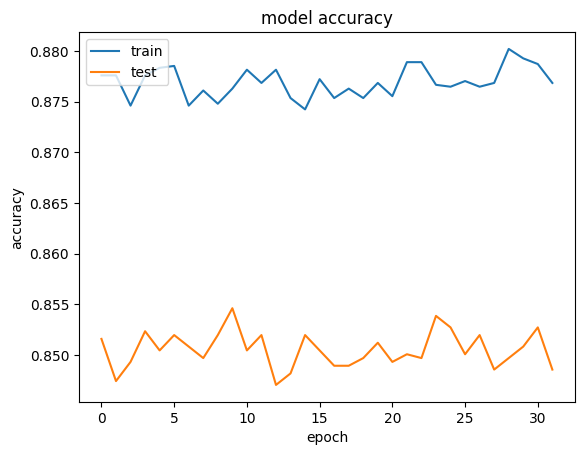

In [53]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [57]:
#Part 3 Making the Predictions and evaluating the model
#prediction the test set results
y_pred = classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 1ms/step


In [58]:
## Make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1530,   65],
       [ 214,  191]])

In [60]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.8605

In [61]:
#get the weights
classifier.get_weights()

[array([[-0.42531177, -0.06857059, -0.11797125,  0.11590002,  0.0331743 ,
         -0.39045665, -0.13678057,  0.04859416, -0.01824464,  0.06160688,
          0.10665569],
        [ 0.13746798, -1.0054932 , -0.5980319 ,  0.25450438,  0.09605059,
          0.910241  ,  0.847254  ,  0.2968428 ,  0.43507934, -0.711106  ,
          0.1086912 ],
        [-0.20852065, -0.18811804, -0.01283075,  0.21685527,  0.06705926,
          0.24222678, -0.16908635, -0.35301068,  0.0275056 , -0.39888412,
          0.12261353],
        [ 0.22075577, -0.28398412, -0.09805003, -0.5085157 , -1.0701193 ,
         -0.33910653, -0.5073568 ,  0.5705008 , -0.07916495,  0.23288205,
         -0.8456826 ],
        [-1.0018692 , -0.1151611 ,  0.01638283, -0.04728807,  0.44638246,
          0.2912111 , -0.4343425 , -0.25683996,  0.8489436 , -0.3180339 ,
         -0.96624887],
        [-0.19139512, -0.50821006, -0.14947298,  0.18972197,  0.03904881,
         -0.13242255, -0.00760087, -0.34219426, -0.00724902,  0.2785822